# Required Libraries

In [3]:
# importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# warnings
import warnings
warnings.filterwarnings('ignore')

# Sklearn 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Data Exploration

In [4]:
# reading dataset
premium = pd.read_csv('insurance.csv')

# this shows first 5 rows by default
premium.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [5]:
# this shows last 5 rows by default
premium.tail()

,age,sex,bmi,children,smoker,region,expenses
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95
1337,61,female,29.1,0,yes,northwest,29141.36


In [6]:
# getting dimensions of the dataset
premium.shape

(1338, 7)

In [7]:
# getting data types 
premium.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
expenses    float64
dtype: object

In [8]:
# getting additional information of the dataset
premium.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [9]:
# getting statistical information about dataset
premium.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


In [10]:
# getting column names of the dataset
premium.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'expenses'], dtype='object')

In [11]:
# getting value counts for "sex"
print(premium.value_counts('sex'))

sex
male      676
female    662
dtype: int64


In [12]:
# getting value counts for "smoker" 
print(premium.value_counts('smoker'))

smoker
no     1064
yes     274
dtype: int64


In [13]:
# getting value counts for" region"
print(premium.value_counts('region'))

region
southeast    364
northwest    325
southwest    325
northeast    324
dtype: int64


# Data Cleaning

In [14]:
# checking for missing values
premium.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

In [15]:
# checking for duplicate values
premium.duplicated().sum()

1

In [16]:
# getting duplicate rows
duplicate = premium[premium.duplicated()]
print("Duplicate rows:", duplicate)

Duplicate rows:      age   sex   bmi  children smoker     region  expenses
581   19  male  30.6         0     no  northwest   1639.56


In [17]:
# removing duplicate rows and storing the data into new dataframe.
premium_df = premium.drop_duplicates(keep='first')
premium_df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [18]:
# rechecking for duplicate values in new dataframe
premium_df.duplicated().sum()

0

In [19]:
# getting dimensions of the dataset of new dataframe 
premium_df.shape

(1337, 7)

In [20]:
# getting statistical information about dataset of new dataframe
premium_df.describe()

,age,bmi,children,expenses
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.665520,1.095737,13279.121638
std,14.044333,6.100664,1.205571,12110.359657
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4746.340000
50%,39.000000,30.400000,1.000000,9386.160000
75%,51.000000,34.700000,2.000000,16657.720000
max,64.000000,53.100000,5.000000,63770.430000


After removing the duplicate entry, there is a negligible difference between the statistical information of previous data and new data.

In [21]:
# checking for correlation among different features
premium_df.corr()

,age,bmi,children,expenses
age,1.000000,0.109414,0.041536,0.298308
bmi,0.109414,1.000000,0.012641,0.198637
children,0.041536,0.012641,1.000000,0.067389
expenses,0.298308,0.198637,0.067389,1.000000


# Data Visualization

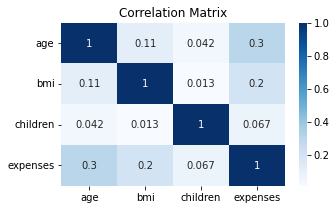

In [22]:
# plotting graph for correlation
premium_df.corr()
plt.figure(figsize=(5,3))
sns.heatmap(premium_df.corr(), annot = True, cmap=plt.cm.Blues)
plt.title("Correlation Matrix")
plt.show()

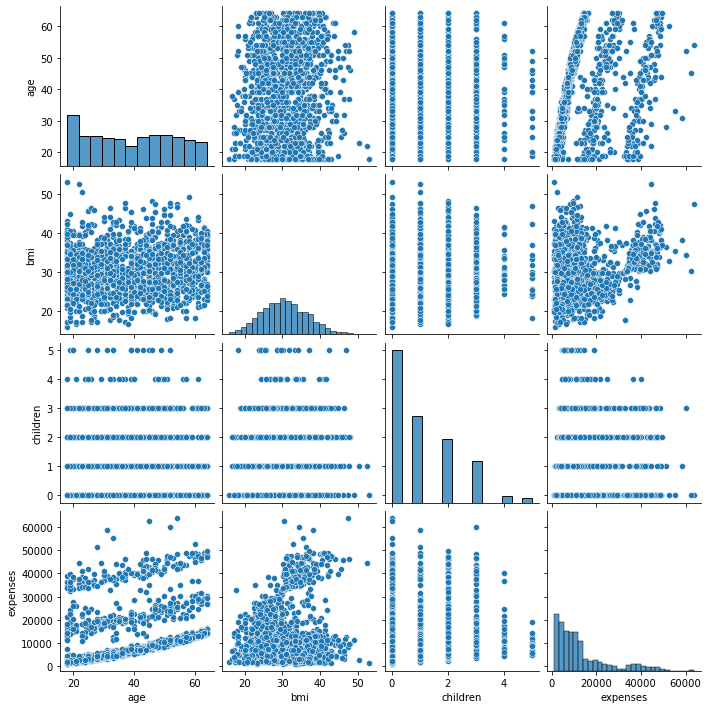

In [23]:
sns.pairplot(premium_df)

Text(0, 0.5, 'expenses')

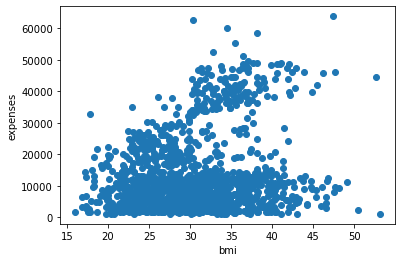

In [24]:
plt.scatter(premium_df['bmi'],premium_df['expenses'])
plt.xlabel('bmi')
plt.ylabel('expenses')

'bmi' and 'expenses' are positively correlated. So there exists linear relationship between these two variables.

Text(0, 0.5, 'expenses')

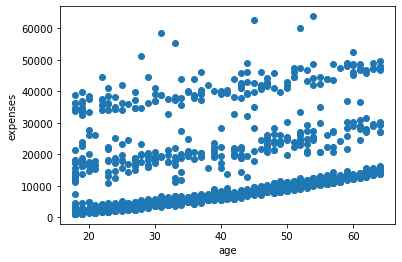

In [25]:
plt.scatter(premium_df['age'],premium_df['expenses'])
plt.xlabel('age')
plt.ylabel('expenses')

'age' and 'expenses' are positively correlated. So there exists linear relationship between these two variables.

<AxesSubplot:xlabel='bmi', ylabel='expenses'>

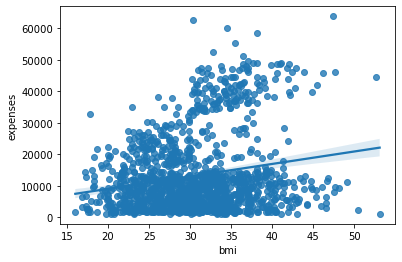

In [26]:
sns.regplot(x='bmi',y='expenses', data = premium_df)

It is observed that with the increase in 'bmi' , the 'expenses' are increasing. Maximum data points lie on the line of best fit.

<AxesSubplot:xlabel='age', ylabel='expenses'>

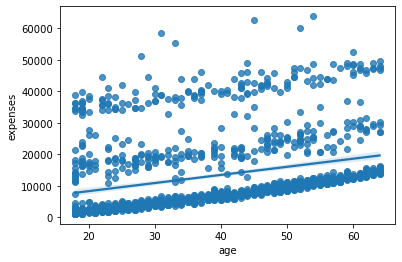

In [27]:
sns.regplot(x='age',y='expenses', data = premium_df)

It is observed that with the increase in 'age' , the 'expenses' are increasing but very few data points lie on the line of best fit.

1. Univariate Analysis

In [28]:
# names and values of "sex" feature
sex_names = premium_df.sex.value_counts().index
sex_values = premium_df.sex.value_counts().values
print(sex_names)
print(sex_values)

Index(['male', 'female'], dtype='object')
[675 662]


([<matplotlib.patches.Wedge at 0x2b113f42d30>,
 [Text(-0.016800012982034103, 1.0998717014105799, 'male'),
  Text(0.01680011595945443, -1.0998716998376443, 'female')],
 [Text(-0.009163643444745873, 0.5999300189512253, '50.49%'),
  Text(0.009163699614247869, -0.5999300180932605, '49.51%')])

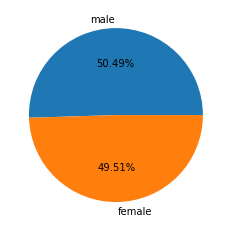

In [29]:
# pie chart for "sex" feature
plt.pie(sex_values,labels = sex_names,autopct = "%1.2f%%")

After analyzing the above chart, it is observed that there is equal distribution of males and females.

In [30]:
# names and values of "smoker" feature
smoker_names = premium_df.smoker.value_counts().index
smoker_values = premium_df.smoker.value_counts().values
print(smoker_names)
print(smoker_values)

Index(['no', 'yes'], dtype='object')
[1063  274]


([<matplotlib.patches.Wedge at 0x2b113f8efa0>,
 [Text(-0.8797849777822367, 0.6602865990376524, 'no'),
  Text(0.8797849468719889, -0.6602866402233593, 'yes')],
 [Text(-0.4798827151539472, 0.36015632674781034, '79.51%'),
  Text(0.4798826982938121, -0.36015634921274137, '20.49%')])

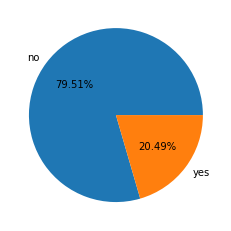

In [31]:
# pie chart for "smoker" feature
plt.pie(smoker_values,labels = smoker_names,autopct = "%1.2f%%")

From the above chart, it is observed that the maximum number of people do not smoke.

In [32]:
# names and values of "region" feature
region_names = premium_df.region.value_counts().index
region_values = premium_df.region.value_counts().values
print(region_names)
print(region_values)

Index(['southeast', 'southwest', 'northwest', 'northeast'], dtype='object')
[364 325 324 324]


([<matplotlib.patches.Wedge at 0x2b114fb5250>,
 [Text(0.7215890706705311, 0.8302464773119123, 'southeast'),
  Text(-0.8640286077747883, 0.6807749737958654, 'southwest'),
  Text(-0.7196362470877354, -0.8319397044723131, 'northwest'),
  Text(0.7963235543877186, -0.7588601957721266, 'northeast')],
 [Text(0.39359403854756236, 0.4528617148974066, '27.23%'),
  Text(-0.47128833151352084, 0.3713318038886538, '24.31%'),
  Text(-0.3925288620478557, -0.4537852933485344, '24.23%'),
  Text(0.43435830239330103, -0.41392374314843267, '24.23%')])

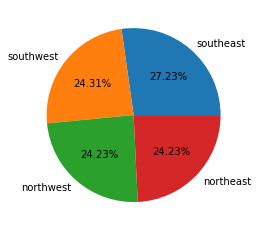

In [33]:
# pie chart for "region" feature
plt.pie(region_values,labels = region_names,autopct = "%1.2f%%")

From the above chart, it is observed that the maximum number of people are from the Southeast region.

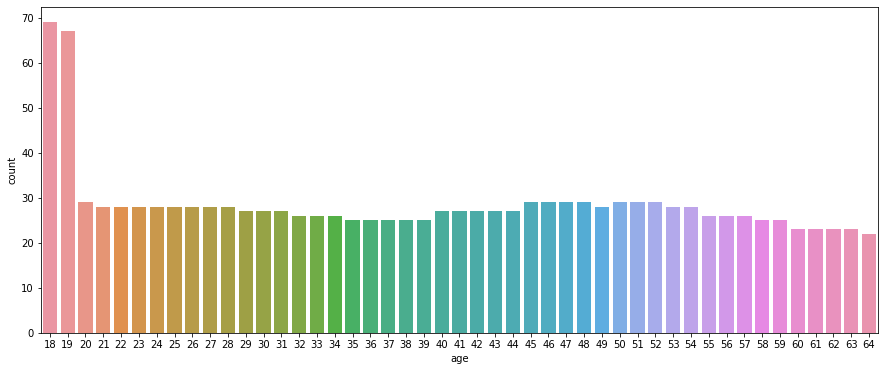

In [34]:
# plotting graph for "age" feature
plt.figure(figsize=(15,6))
sns.countplot(x=premium_df.age)
plt.show()

From the above graph, it is observed that the maximum number of people are 18 and 19 years old.

In [35]:
# names and values of "children" feature
children_names = premium_df.children.value_counts().index
children_values = premium_df.children.value_counts().values
print(children_names)
print(children_values)

Int64Index([0, 1, 2, 3, 4, 5], dtype='int64')
[573 324 240 157  25  18]


([<matplotlib.patches.Wedge at 0x2b115312a30>,
 [Text(0.2447730130080499, 1.0724207066739067, '0'),
  Text(-1.0467198531072106, -0.33819750015518996, '1'),
  Text(0.0736090716588521, -1.09753437511976, '2'),
  Text(0.9255059033806083, -0.5945072100552224, '3'),
  Text(1.0887198297987304, -0.1571277575828781, '4'),
  Text(1.0990162607692266, -0.046510843518769523, '5')],
 [Text(0.1335125525498454, 0.5849567490948581, '42.86%'),
  Text(-0.570938101694842, -0.18447136372101267, '24.23%'),
  Text(0.04015040272301023, -0.5986551137016872, '17.95%'),
  Text(0.5048214018439681, -0.3242766600301213, '11.74%'),
  Text(0.5938471798902165, -0.08570604959066079, '1.87%'),
  Text(0.5994634149650326, -0.025369551010237922, '1.35%')])

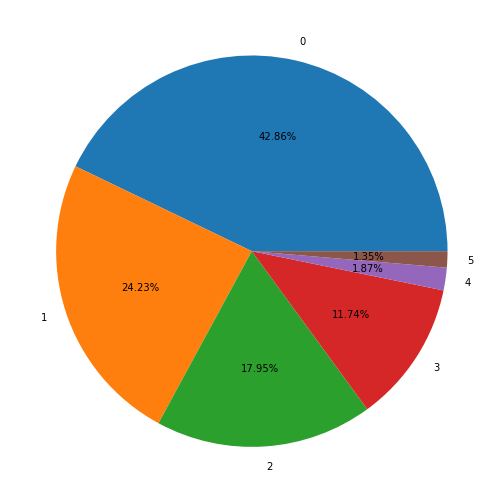

In [36]:
# pie chart for "children" feature
plt.figure(figsize=(9,9))
plt.pie(children_values,labels = children_names,autopct = "%1.2f%%")

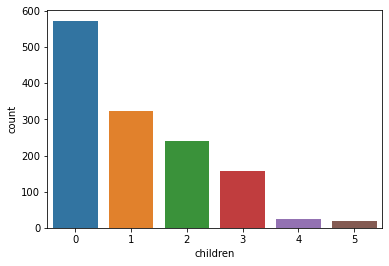

In [37]:
# plotting graph for "children" feature
sns.countplot(x=premium_df.children)
plt.show()

From the above graphs, it is observed that the maximum number of couples do not have children.

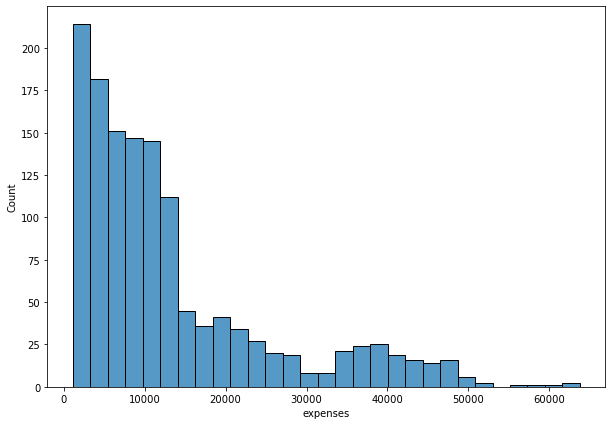

In [38]:
# plotting graph for "expenses" feature
plt.figure(figsize=(10,7))
sns.histplot(premium_df['expenses']) 
plt.show()

It is observed that the maximum insurance amount given is 60,000 but the maximum count lies between 1 to 10,000.

2. Bivariate Analysis

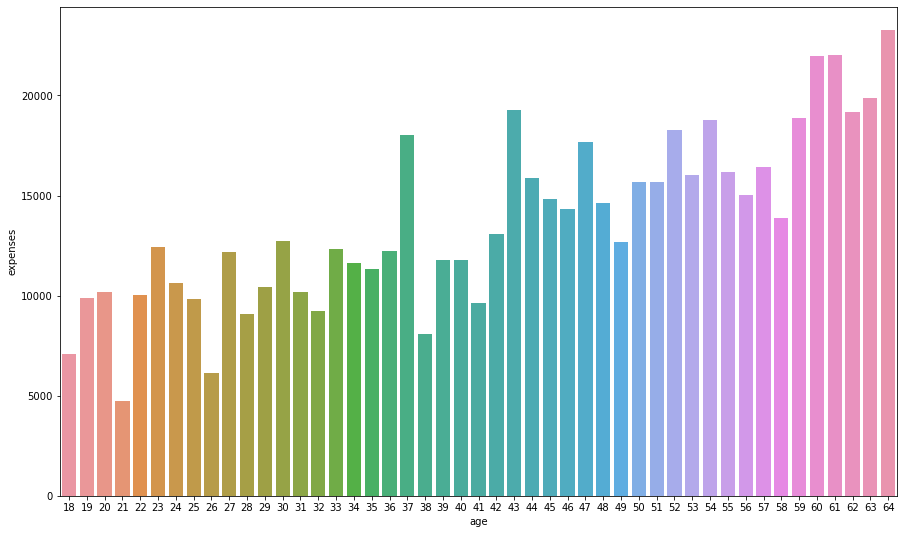

In [39]:
# plotting barplot between "expenses" and "age"
plt.figure(figsize=(15,9))
sns.barplot(y='expenses',x='age',data=premium_df,ci= 0)
plt.show()

It is observed that the maximum insurance amount is given to people who are 64 years old. 

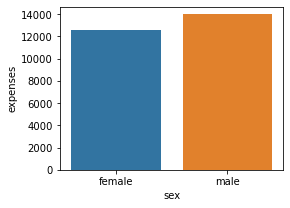

In [40]:
# plotting barplot between "expenses" and "sex"
plt.figure(figsize=(4,3))
sns.barplot(y='expenses',x='sex',data=premium_df,ci= 0)
plt.show()

It is observed that the maximum insurance amount is given to the males.

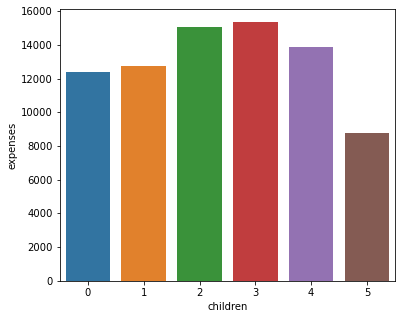

In [41]:
# plotting barplot between "expenses" and "children"
plt.figure(figsize=(6,5))
sns.barplot(y='expenses',x='children',data=premium_df,ci= 0)
plt.show()

From the above graph, it is observed that the maximum insurance amount is given to couples who have 3 children.

# Outlier Detection

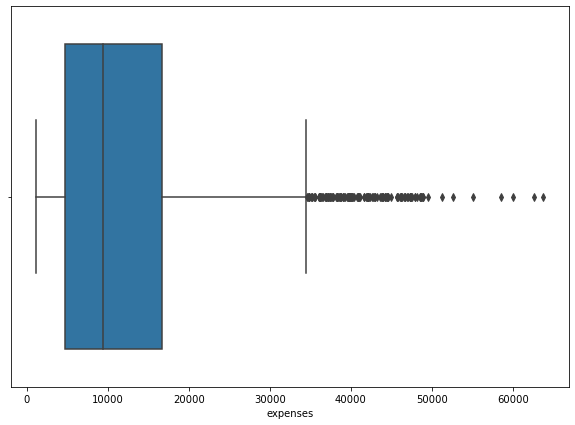

In [42]:
# outlier detection for "expenses"
plt.figure(figsize=(10,7))
sns.boxplot(premium_df['expenses']) 
plt.show()

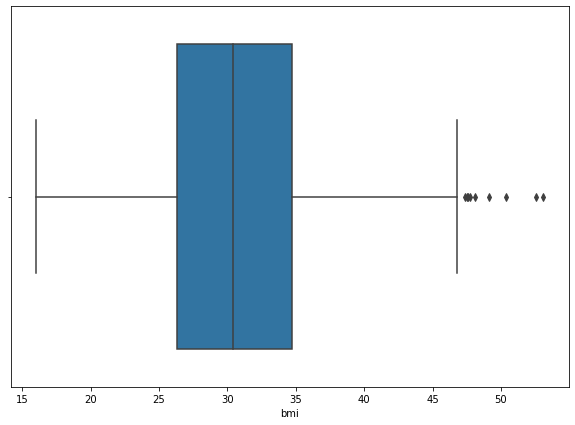

In [43]:
# outlier detection for "bmi"
plt.figure(figsize=(10,7))
sns.boxplot(premium_df['bmi']) 
plt.show()

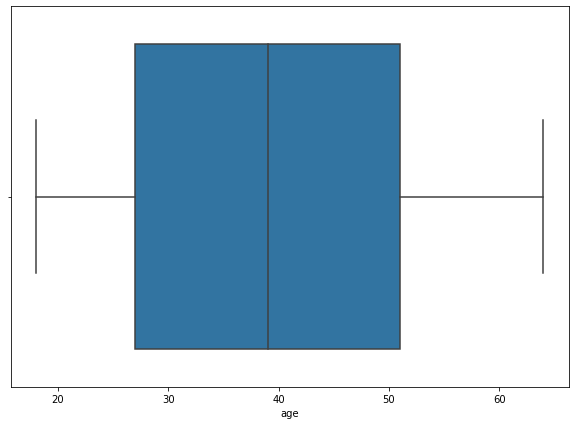

In [44]:
# outlier detection for "age"
plt.figure(figsize=(10,7))
sns.boxplot(premium_df['age']) 
plt.show()

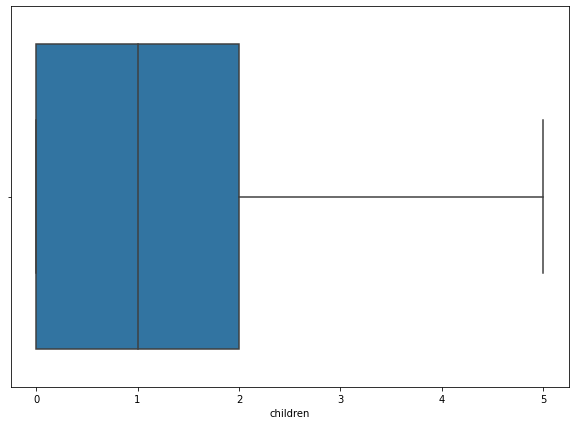

In [45]:
# outlier detection for "children"
plt.figure(figsize=(10,7))
sns.boxplot(premium_df['children']) 
plt.show()

From the above graphs it is observed that columns "expenses" and "bmi" have outliers.

# Outlier Treatment using IQR

In [46]:
# finding quartiles for column "expenses"
Q1 = premium_df.expenses.quantile(0.25)
Q3 = premium_df.expenses.quantile(0.75)
Q1,Q3

(4746.34, 16657.72)

In [47]:
# Inter Quartile Range for "expenses"
IQR = Q3 - Q1
IQR 

11911.380000000001

In [48]:
# finding upper limit and lower limit for "expenses"
lower_limit_exp = Q1 - 1.5*IQR
upper_limit_exp = Q3 + 1.5*IQR
lower_limit_exp , upper_limit_exp

(-13120.73, 34524.79)

In [49]:
# outliers in "expenses" column
outliers_exp = premium_df[(premium_df.expenses<lower_limit_exp) | (premium_df.expenses>upper_limit_exp)]
outliers_exp

,age,sex,bmi,children,smoker,region,expenses
14,27,male,42.1,0,yes,southeast,39611.76
19,30,male,35.3,0,yes,southwest,36837.47
23,34,female,31.9,1,yes,northeast,37701.88
29,31,male,36.3,2,yes,southwest,38711.00
30,22,male,35.6,0,yes,southwest,35585.58
...,...,...,...,...,...,...,...
1300,45,male,30.4,0,yes,southeast,62592.87
1301,62,male,30.9,3,yes,northwest,46718.16
1303,43,male,27.8,0,yes,southwest,37829.72
1313,19,female,34.7,2,yes,southwest,36397.58


In [50]:
# data with no outliers in "expenses" column
no_outlier_exp = premium_df[(premium_df.expenses > lower_limit_exp) & (premium_df.expenses < upper_limit_exp)]
no_outlier_exp

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95


In [51]:
# finding quartiles for column "bmi"
q1 = premium_df.bmi.quantile(0.25)
q3 = premium_df.bmi.quantile(0.75)
q1,q3

(26.3, 34.7)

In [52]:
# Inter Quartile Range for "bmi"
iqr = q3 - q1
iqr 

8.400000000000002

In [53]:
# finding upper limit and lower limit for "bmi"
lower_limit_bmi = q1 - 1.5*iqr
upper_limit_bmi = q3 + 1.5*iqr
lower_limit_bmi , upper_limit_bmi

(13.699999999999998, 47.300000000000004)

In [54]:
# outliers in "bmi" column
outliers_bmi = premium_df[(premium_df.bmi < lower_limit_bmi) | (premium_df.bmi > upper_limit_bmi)]
outliers_bmi

,age,sex,bmi,children,smoker,region,expenses
116,58,male,49.1,0,no,southeast,11381.33
286,46,female,48.1,2,no,northeast,9432.93
401,47,male,47.5,1,no,southeast,8083.92
543,54,female,47.4,0,yes,southeast,63770.43
847,23,male,50.4,1,no,southeast,2438.06
860,37,female,47.6,2,yes,southwest,46113.51
1047,22,male,52.6,1,yes,southeast,44501.40
1088,52,male,47.7,1,no,southeast,9748.91
1317,18,male,53.1,0,no,southeast,1163.46


In [55]:
# data with no outlier in "bmi" column
no_outlier_bmi = premium_df[(premium_df.bmi > lower_limit_bmi) & (premium_df.bmi < upper_limit_bmi)]
no_outlier_bmi

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95


In [56]:
# merging of data ( data without outliers)
data = pd.merge(no_outlier_exp, no_outlier_bmi,how ="inner",on=['age', 'sex', 'bmi', 'children', 'smoker', 'region','expenses'])
print(data.shape)
data.head()

(1192, 7)


,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


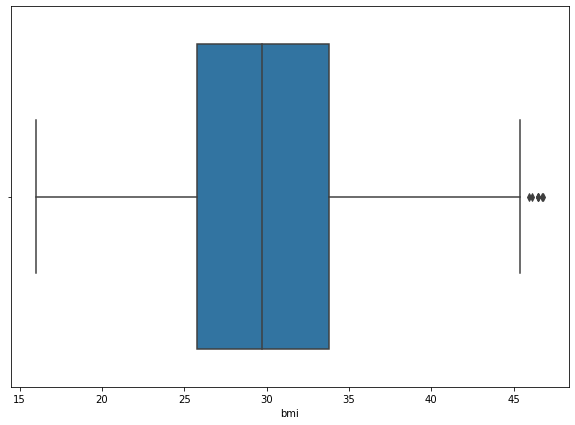

In [57]:
# rechecking for outliers for "bmi" feature
plt.figure(figsize=(10,7))
sns.boxplot(data['bmi']) 
plt.show()

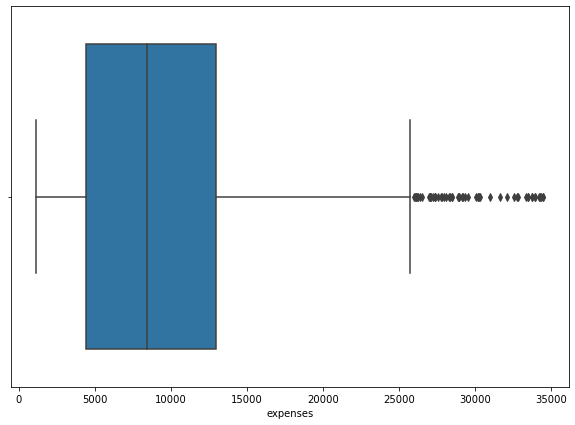

In [58]:
# rechecking for outliers for "expenses" feature
plt.figure(figsize=(10,7))
sns.boxplot(data['expenses']) 
plt.show()

# Feature Engineering

In [59]:
# Applying one-hot encoding on "Sex" and "Smoker" to convert categorical values into numerical values
sex_df = pd.get_dummies(premium_df.sex, prefix = "sex_")
smoker_df = pd.get_dummies(premium_df.smoker, prefix = "smoker_")

In [60]:
# concatenation of all dataframes
data_final = pd.concat([premium_df, sex_df, smoker_df], axis = 1)
data_final.head()

,age,sex,bmi,children,smoker,region,expenses,sex__female,sex__male,smoker__no,smoker__yes
0,19,female,27.9,0,yes,southwest,16884.92,1,0,0,1
1,18,male,33.8,1,no,southeast,1725.55,0,1,1,0
2,28,male,33.0,3,no,southeast,4449.46,0,1,1,0
3,33,male,22.7,0,no,northwest,21984.47,0,1,1,0
4,32,male,28.9,0,no,northwest,3866.86,0,1,1,0


In [61]:
# dropping unnecessary columns
data_final = data_final.drop(['sex','smoker','region'], axis = 1)
data_final.head()

,age,bmi,children,expenses,sex__female,sex__male,smoker__no,smoker__yes
0,19,27.9,0,16884.92,1,0,0,1
1,18,33.8,1,1725.55,0,1,1,0
2,28,33.0,3,4449.46,0,1,1,0
3,33,22.7,0,21984.47,0,1,1,0
4,32,28.9,0,3866.86,0,1,1,0


In [62]:
# dimensions of new dataset
data_final.shape

(1337, 8)

In [63]:
data_final['expenses'] = round(data_final['expenses'],1)
data_final.head()

,age,bmi,children,expenses,sex__female,sex__male,smoker__no,smoker__yes
0,19,27.9,0,16884.9,1,0,0,1
1,18,33.8,1,1725.6,0,1,1,0
2,28,33.0,3,4449.5,0,1,1,0
3,33,22.7,0,21984.5,0,1,1,0
4,32,28.9,0,3866.9,0,1,1,0


In [64]:
# separating independent and target features
x = data_final.drop(['expenses'],axis =1)
y = data_final['expenses']
print(x.shape)

(1337, 7)


In [65]:
# splitting dataset into training set and test set
xtrain, xtest, ytrain, ytest = train_test_split(x, y,test_size = 0.2, random_state = 50)

In [66]:
xtrain

,age,bmi,children,sex__female,sex__male,smoker__no,smoker__yes
45,55,37.3,0,0,1,1,0
201,48,32.2,1,1,0,1,0
153,42,23.4,0,1,0,0,1
1132,57,40.3,0,0,1,1,0
163,32,29.8,2,1,0,1,0
...,...,...,...,...,...,...,...
229,47,25.5,2,0,1,1,0
70,27,24.8,0,1,0,0,1
132,53,35.9,2,1,0,1,0
1314,30,23.7,3,1,0,0,1


In [67]:
xtest

,age,bmi,children,sex__female,sex__male,smoker__no,smoker__yes
1106,49,29.9,0,1,0,1,0
1268,20,33.3,0,1,0,1,0
287,63,26.2,0,1,0,1,0
232,19,17.8,0,1,0,1,0
849,55,32.8,0,0,1,1,0
...,...,...,...,...,...,...,...
495,20,27.9,0,0,1,1,0
278,59,31.8,2,0,1,1,0
1012,61,33.3,4,1,0,1,0
203,27,36.1,0,1,0,0,1


In [68]:
# standardizing the dataset 
scaler = StandardScaler()

In [69]:
xtrain = scaler.fit_transform(xtrain)
xtrain

array([[ 1.14429046,  1.08363412, -0.90040547, ...,  0.96235447,
         0.504673  , -0.504673  ],
       [ 0.6471224 ,  0.25528555, -0.06776408, ..., -1.03911815,
         0.504673  , -0.504673  ],
       [ 0.22097835, -1.17402179, -0.90040547, ..., -1.03911815,
        -1.98148108,  1.98148108],
       ...,
       [ 1.00224245,  0.85624431,  0.76487731, ..., -1.03911815,
         0.504673  , -0.504673  ],
       [-0.63130976, -1.12529541,  1.5975187 , ..., -1.03911815,
        -1.98148108,  1.98148108],
       [ 1.71248254,  0.72630728, -0.90040547, ...,  0.96235447,
        -1.98148108,  1.98148108]])

In [70]:
xtest = scaler.transform(xtest)
xtest

array([[ 0.71814641, -0.11828342, -0.90040547, ..., -1.03911815,
         0.504673  , -0.504673  ],
       [-1.34154985,  0.43394896, -0.90040547, ..., -1.03911815,
         0.504673  , -0.504673  ],
       [ 1.71248254, -0.71924218, -0.90040547, ..., -1.03911815,
         0.504673  , -0.504673  ],
       ...,
       [ 1.57043452,  0.43394896,  2.43016009, ..., -1.03911815,
         0.504673  , -0.504673  ],
       [-0.84438179,  0.88872857, -0.90040547, ..., -1.03911815,
        -1.98148108,  1.98148108],
       [ 1.07326646,  0.84000218,  1.5975187 , ..., -1.03911815,
         0.504673  , -0.504673  ]])

# Model Training and Selection

# Linear Regression

In [71]:
lr = LinearRegression()
lr.fit(xtrain,ytrain)
lr_pred = lr.predict(xtest)
lr_pred

array([10298.09023582,  3890.46402683, 12776.86809566,  -992.69529655,
       12747.6730165 , 27301.83300889, 14085.62765407, 30969.21348246,
        4092.26546979, 37132.00922378, 34672.98491418, 14305.30331911,
        7116.18395332, 27068.32598866,  5123.24518751, 14972.27893452,
        4280.16940015, 33209.91293037, 28940.85430567, 17349.923594  ,
        9578.6173695 , 38042.83458719, 11224.89513992, 11300.98493648,
       12170.63390606,  8801.41799336, 12599.02669166,  5611.59737   ,
       16184.0175078 ,  5788.94711898, 12704.07341649,  8374.4128809 ,
        4871.20607798, 13209.06300689,  9698.26730593, 29539.07551845,
       35615.80881912, 11547.63555649, 10976.51605074,  7782.41699995,
        6848.25259501, 13430.0996478 ,  5756.58367449,  6994.13491762,
       38102.37426775, 36746.05375308, 10894.65750847,  8604.29934093,
       32771.3334567 , 12162.68010506,  6591.06314685,  5197.4034329 ,
       15792.01568035,  7508.93093991, 37232.76475831, 14999.09026764,
      

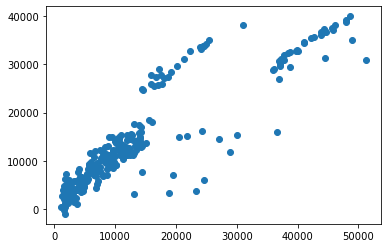

In [72]:
plt.scatter(ytest,lr_pred)

In [73]:
lr_residuals = ytest - lr_pred
lr_residuals

1106    -1309.890236
1268    -2009.964027
287      1479.331904
232      2720.495297
849     -2146.073016
            ...     
495      -359.536454
278     -1363.652684
1012    20556.780789
203      7112.280505
1018    -2073.125135
Name: expenses, Length: 268, dtype: float64

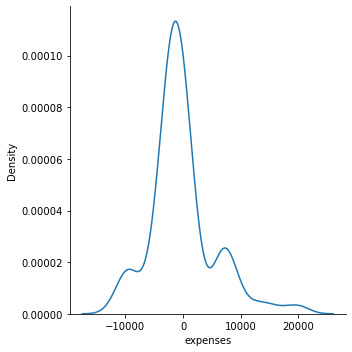

In [74]:
sns.displot(lr_residuals, kind='kde')

In [75]:
# Evaluation of performance of Linear Regression model
MSE = mean_squared_error(ytest, lr_pred) 
print("MSE:",MSE)

MAE = mean_absolute_error(ytest, lr_pred) 
print("MAE:",MAE)

print(np.sqrt(mean_squared_error(ytest, lr_pred)))

MSE: 30630632.661600538
MAE: 3854.9126342703134
5534.494797323468


In [76]:
# calculating R2 score
R_Score = r2_score(ytest, lr_pred) 
print("R_Score:",R_Score)

R_Score: 0.802264853714528


# Decision Tree Regression

In [77]:
dt = DecisionTreeRegressor()
dt.fit(xtrain,ytrain)
dt_pred = dt.predict(xtest)
dt_pred

array([ 7789.6,  1880.1, 13041.9,  1728.9, 20781.5, 18608.3,  9877.6,
       35491.6,  2254.8, 46113.5, 41919.1, 12643.4,  6067.1, 17560.4,
        2855.4,  8125.8, 22493.7, 24667.4, 17361.8, 14410.9,  6338.1,
       43753.3, 13047.3, 11082.6,  9872.7,  6313.8, 12914. ,  4040.6,
       11566.3,  3238.4, 10928.8,  7153.6, 14133. , 11488.3, 10422.9,
       36307.8, 42211.1,  7345.7, 10118.4,  4894.8,  8252.3, 12925.9,
       18218.2,  7173.4, 29141.4, 46889.3,  5920.1,  5397.6, 21223.7,
       24513.1,  4738.3,  7133.9, 13981.8,  6196.4, 43254.4, 11264.5,
        9964.1,  4133.6,  8252.3, 12363.6, 15230.3,  8604.5, 13047.3,
       10269.5,  2681. , 10959.7,  4719.7, 23045.6, 32734.2,  6571. ,
       23065.4, 13635.6, 12523.6, 39125.3,  6571. , 17626.2, 48970.2,
       17469. , 26125.7, 13429. ,  2690.1, 15170.1,  6571. ,  3260.2,
        4032.2,  8428.1, 18955.2,  9704.7,  3353.3,  1252.4,  3757.8,
        7954.5,  7173.4,  2362.2,  5976.8, 23306.6,  4058.7,  8604.5,
       16657.7,  535

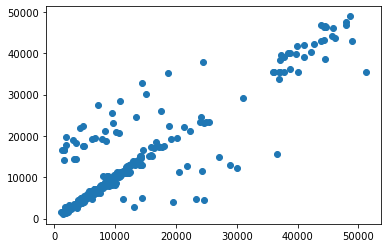

In [78]:
plt.scatter(ytest,dt_pred)

In [79]:
dt_residuals = ytest - dt_pred
dt_residuals

1106     1198.6
1268        0.4
287      1214.3
232        -1.1
849    -10179.9
         ...   
495       714.6
278      -991.0
1012    20968.1
203      1548.3
1018     1230.8
Name: expenses, Length: 268, dtype: float64

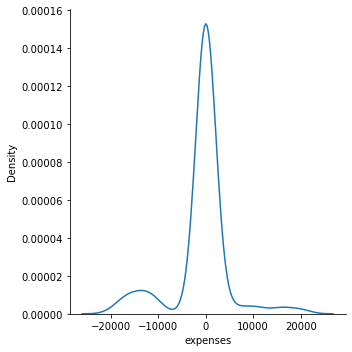

In [80]:
sns.displot(dt_residuals, kind='kde')

In [81]:
# Evaluation of performance of Decision Tree Regression model
dt_MSE = mean_squared_error(ytest, dt_pred) 
print("MSE:",dt_MSE)

dt_MAE = mean_absolute_error(ytest, dt_pred) 
print("MAE:",dt_MAE)

print(np.sqrt(mean_squared_error(ytest, dt_pred)))

MSE: 36019451.30757463
MAE: 2986.9817164179103
6001.620723402523


In [82]:
# calculating R2 score
Score = r2_score(ytest, dt_pred) 
print("R_Score:",Score)

R_Score: 0.7674774937850225


# Random Forest Regressor

In [83]:
rfr = RandomForestRegressor()
rfr.fit(xtrain,ytrain)
rfr_pred = rfr.predict(xtest)
rfr_pred

array([ 9097.628     ,  4446.647     , 14952.23      ,  2358.707     ,
       13849.835     , 18862.503     ,  9984.664     , 39756.935     ,
        3119.776     , 46345.873     , 41828.984     , 12568.557     ,
        6149.568     , 17620.131     ,  7333.875     ,  9449.355     ,
       10737.272     , 23907.205     , 19347.946     , 14282.878     ,
        7484.923     , 44815.651     , 13633.14      , 14995.28      ,
       11607.186     ,  6871.087     , 13755.058     ,  9252.048     ,
       11682.71      ,  7414.172     , 11466.787     ,  7857.162     ,
       10980.51      , 14687.33      , 12039.488     , 39398.062     ,
       43509.099     , 10033.771     ,  9663.208     ,  4991.611     ,
        7972.69      , 16379.86      ,  7926.636     ,  7670.638     ,
       29207.849     , 45908.988     ,  6667.628     ,  5878.36      ,
       23270.839     , 19116.28066667,  7945.935     ,  6962.74      ,
       13903.2801    ,  7491.482     , 45675.55      , 12765.71      ,
      

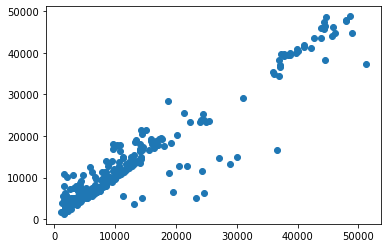

In [84]:
plt.scatter(ytest,rfr_pred)

In [85]:
rfr_residuals = ytest - rfr_pred
rfr_residuals

1106     -109.428
1268    -2566.147
287      -696.030
232      -630.907
849     -3248.235
          ...    
495        -0.952
278     -1672.262
1012    19980.296
203       446.816
1018     -708.673
Name: expenses, Length: 268, dtype: float64

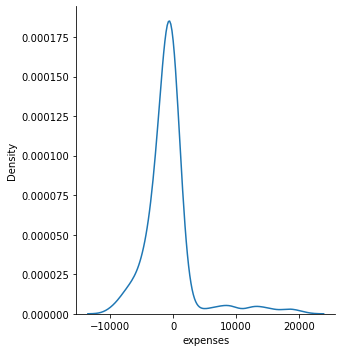

In [86]:
sns.displot(rfr_residuals, kind='kde')

In [87]:
# Evaluation of performance of Random Forest Regression model
mse = mean_squared_error(ytest, rfr_pred) 
print("MSE:",mse)

mae = mean_absolute_error(ytest, rfr_pred) 
print("MAE:",mae)

print(np.sqrt(mean_squared_error(ytest, rfr_pred)))

MSE: 16406882.581928805
MAE: 2364.2984686567165
4050.541023360806


In [88]:
# calculating R2 score
RScore = r2_score(ytest, rfr_pred) 
print("R_Score:",RScore)

R_Score: 0.8940858530978597


Final Observation:

Based on the R2 score, the Random Forest Regression model performed better which has an R2 score value of 0.89. So we will consider the Random Forest Regression algorithm for insurance prediction.